In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

In [2]:
# this path determines where downloaded data will be stored
dataset_path = os.environ.get("DATASETS")
dataset_name = 'ecephys_cache_dir'
manifest_path = os.path.join(dataset_path, dataset_name, "manifest.json")

cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

In [3]:
sessions = cache.get_session_table()
brain_observatory_type_sessions = sessions[sessions["session_type"] == "brain_observatory_1.1"]
brain_observatory_type_sessions.tail()

,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
773418906,2019-10-03T00:00:00Z,757329624,brain_observatory_1.1,124.0,F,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,546,2232,6,"[PPT, NOT, SUB, ProS, CA1, VISam, nan, APN, DG..."
791319847,2019-10-03T00:00:00Z,769360779,brain_observatory_1.1,116.0,M,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,555,2229,6,"[APN, DG, CA1, VISam, nan, LP, TH, VISpm, POL,..."
797828357,2019-10-03T00:00:00Z,776061251,brain_observatory_1.1,107.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,611,2232,6,"[PPT, MB, APN, NOT, HPF, ProS, CA1, VISam, nan..."
798911424,2019-10-03T00:00:00Z,775876828,brain_observatory_1.1,110.0,F,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,825,2233,6,"[APN, TH, Eth, LP, DG, HPF, CA3, CA1, VISrl, n..."
799864342,2019-10-03T00:00:00Z,772616823,brain_observatory_1.1,129.0,M,wt/wt,604,2233,6,"[APN, POL, LP, DG, CA1, VISrl, nan, LGd, CA3, ..."


In [4]:
session_id = 791319847
session = cache.get_session_data(session_id)
session.metadata

{'specimen_name': 'Vip-IRES-Cre;Ai32-417678',
 'session_type': 'brain_observatory_1.1',
 'full_genotype': 'Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt',
 'sex': 'M',
 'age_in_days': 116.0,
 'rig_equipment_name': 'NP.1',
 'num_units': 555,
 'num_channels': 2229,
 'num_probes': 6,
 'num_stimulus_presentations': 70931,
 'session_start_time': datetime.datetime(2019, 1, 8, 13, 55, 1, tzinfo=tzoffset(None, -28800)),
 'ecephys_session_id': 791319847,
 'structure_acronyms': ['VISpm',
  nan,
  'LP',
  'TH',
  'DG',
  'CA1',
  'CA3',
  'CA2',
  'VISl',
  'ZI',
  'LGv',
  'VISal',
  'APN',
  'POL',
  'VISrl',
  'VISam',
  'LGd',
  'ProS',
  'SUB',
  'VISp'],
 'stimulus_names': ['spontaneous',
  'gabors',
  'flashes',
  'drifting_gratings',
  'natural_movie_three',
  'natural_movie_one',
  'static_gratings',
  'natural_scenes',
  'drifting_gratings_contrast']}

In [41]:
# show units per brain region
session.structurewise_unit_counts

VISp     93
CA1      85
VISrl    58
VISl     56
VISam    49
VISal    43
SUB      41
CA3      33
DG       32
VISpm    17
LGv      16
LP        9
LGd       8
TH        4
ZI        4
POL       3
CA2       3
ProS      1
Name: ecephys_structure_acronym, dtype: int64

In [46]:
# select only units within the VISp brain region
session.units[session.units["ecephys_structure_acronym"] == 'VISp']

,presence_ratio,waveform_spread,waveform_velocity_below,firing_rate,waveform_velocity_above,max_drift,silhouette_score,L_ratio,isolation_distance,cluster_id,...,ecephys_structure_id,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data
unit_id,,,,,,,,,,,,,,,,,,,,,
951061537,0.99,50.0,-0.686767,5.015605,0.343384,44.04,0.109007,0.002312,71.959187,226,...,385.0,VISp,8588.0,1364.0,7795.0,probeC,See electrode locations,29999.993174,1249.999716,True
951061574,0.99,50.0,0.000000,4.732604,0.686767,37.44,0.134523,0.000201,82.285718,232,...,385.0,VISp,8593.0,1347.0,7801.0,probeC,See electrode locations,29999.993174,1249.999716,True
951061568,0.99,50.0,0.000000,3.224386,0.686767,35.15,0.070784,0.000074,78.492807,231,...,385.0,VISp,8593.0,1347.0,7801.0,probeC,See electrode locations,29999.993174,1249.999716,True
951061556,0.99,60.0,-0.343384,7.964678,1.716918,45.04,0.086411,0.000845,74.043491,229,...,385.0,VISp,8593.0,1347.0,7801.0,probeC,See electrode locations,29999.993174,1249.999716,True
951061549,0.99,60.0,0.000000,4.192932,0.686767,43.89,0.068346,0.017759,48.826263,228,...,385.0,VISp,8593.0,1347.0,7801.0,probeC,See electrode locations,29999.993174,1249.999716,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951062833,0.99,80.0,0.176597,0.939717,0.000000,54.39,NaN,0.003555,48.555922,460,...,385.0,VISp,8761.0,775.0,8035.0,probeC,See electrode locations,29999.993174,1249.999716,True
951062587,0.99,60.0,0.206030,14.907381,0.686767,44.32,0.061305,0.017557,64.649537,409,...,385.0,VISp,8761.0,775.0,8035.0,probeC,See electrode locations,29999.993174,1249.999716,True
951062854,0.99,60.0,-1.373534,0.937027,0.618090,46.00,0.152001,0.001124,58.013601,464,...,385.0,VISp,8768.0,751.0,8046.0,probeC,See electrode locations,29999.993174,1249.999716,True


In [5]:
scene_presentations = session.get_stimulus_table("natural_scenes")
units = session.units

spikes = session.presentationwise_spike_times(
    stimulus_presentation_ids=scene_presentations.index.values,
    unit_ids=units.index.values
)
spikes

,stimulus_presentation_id,unit_id,time_since_stimulus_presentation_onset
spike_time,,,
5914.083166,51355,951064043,0.000524
5914.083407,51355,951060126,0.000765
5914.084307,51355,951061801,0.001665
5914.084340,51355,951059473,0.001698
5914.084733,51355,951064231,0.002091
...,...,...,...
8573.806342,68228,951068915,0.249661
8573.806475,68228,951067105,0.249794
8573.806742,68228,951067887,0.250061


In [6]:
spikes = spikes.groupby(["stimulus_presentation_id", "unit_id"]).count()
"""print(type(tmp),tmp.shape)
print(tmp.index[1])
print(tmp.iloc[0])
print(type(tmp.iloc[0]))
print(tmp.iloc[0,0])
#print(tmp[tmp.iloc[0]])
tmp"""

'print(type(tmp),tmp.shape)\nprint(tmp.index[1])\nprint(tmp.iloc[0])\nprint(type(tmp.iloc[0]))\nprint(tmp.iloc[0,0])\n#print(tmp[tmp.iloc[0]])\ntmp'

In [7]:
design = pd.pivot_table(
    spikes, 
    values='time_since_stimulus_presentation_onset', 
    index="stimulus_presentation_id", 
    columns="unit_id", 
    fill_value=0.0,
    aggfunc=np.sum
)
design

unit_id,951058482,951058595,951058608,951058613,951058664,951058683,951058717,951058722,951058750,951058759,...,951073825,951073889,951073896,951073905,951073920,951073933,951074117,951074135,951074143,951074171
stimulus_presentation_id,,,,,,,,,,,,,,,,,,,,,
51355,1,0,9,11,0,0,14,3,9,11,...,5,12,2,1,0,3,2,0,0,0
51356,6,2,2,2,0,6,7,2,6,7,...,2,5,0,0,0,7,0,0,0,0
51357,11,0,6,1,0,2,10,0,2,2,...,1,4,0,1,0,12,0,2,0,0
51358,6,2,4,3,0,4,8,2,3,8,...,2,6,0,2,0,9,0,4,1,0
51359,5,0,4,3,0,2,7,0,0,3,...,1,1,0,4,1,7,0,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68224,4,3,1,5,0,0,8,0,0,6,...,1,2,1,0,0,13,0,0,0,0
68225,6,2,4,5,0,0,13,0,0,4,...,0,0,0,0,0,11,0,0,2,0
68226,5,2,4,5,0,2,9,0,0,5,...,0,7,0,0,1,8,0,0,0,0


In [8]:
targets = scene_presentations.loc[design.index.values, "frame"]
targets

stimulus_presentation_id
51355     14
51356      0
51357      8
51358    106
51359      8
        ... 
68224     35
68225     35
68226     73
68227     95
68228     95
Name: frame, Length: 5950, dtype: object

In [9]:
#from sklearn import svm
#from sklearn.model_selection import KFold
#from sklearn.metrics import confusion_matrix

In [10]:
design_arr = design.values.astype(float)
targets_arr = targets.values.astype(int)

print(type(design_arr), design_arr.shape)
print(type(targets_arr), targets_arr.shape)
print(design_arr)
print(targets_arr)

labels = np.unique(targets_arr)
labels

<class 'numpy.ndarray'> (5950, 555)
<class 'numpy.ndarray'> (5950,)
[[ 1.  0.  9. ...  0.  0.  0.]
 [ 6.  2.  2. ...  0.  0.  0.]
 [11.  0.  6. ...  2.  0.  0.]
 ...
 [ 5.  2.  4. ...  0.  0.  0.]
 [ 2.  1.  2. ...  0.  3.  0.]
 [ 6.  0.  3. ...  0.  0.  0.]]
[14  0  8 ... 73 95 95]


array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117])

In [11]:
%load_ext autoreload
%autoreload 2

from Models import MindReader
import tensorflow as tf

In [12]:
# preprocess input (standardise)
design_arr -= np.mean(design_arr)
design_arr /= np.std(design_arr)

# lowest target value is -1, shift so that range starts at 0
targets_arr -= np.min(targets_arr)
num_categories = max(targets_arr)+1 # size of NN output

In [13]:
model = MindReader(num_categories)

model.compile(
    optimizer=tf.keras.optimizers.RMSprop(),  # Optimizer
    # Loss function to minimize
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

# Build (by specifying input_shape) and summarize model
mb_size = 32
input_shape = [mb_size,design_arr.shape[-1]]
model.build(input_shape)
model.summary()

Model: "mind_reader"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  66164     
_________________________________________________________________
softmax (Softmax)            multiple                  0         
Total params: 66,164
Trainable params: 66,164
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(x=design_arr,y=targets_arr,batch_size=32,epochs=15,validation_split=0.1,shuffle=True)
print("CHANCE: {}".format(1/labels.size))

Epoch 1/15
168/168 [==============================] - 1s 6ms/step - loss: 5.0163 - sparse_categorical_accuracy: 0.0295 - val_loss: 3.9400 - val_sparse_categorical_accuracy: 0.1277
Epoch 2/15
168/168 [==============================] - 0s 1ms/step - loss: 3.3260 - sparse_categorical_accuracy: 0.3144 - val_loss: 3.0850 - val_sparse_categorical_accuracy: 0.3630
Epoch 3/15
168/168 [==============================] - 0s 1ms/step - loss: 2.3238 - sparse_categorical_accuracy: 0.6243 - val_loss: 2.4933 - val_sparse_categorical_accuracy: 0.5042
Epoch 4/15
168/168 [==============================] - 0s 2ms/step - loss: 1.6313 - sparse_categorical_accuracy: 0.7858 - val_loss: 2.1026 - val_sparse_categorical_accuracy: 0.5782
Epoch 5/15
168/168 [==============================] - 0s 2ms/step - loss: 1.1646 - sparse_categorical_accuracy: 0.8576 - val_loss: 1.8718 - val_sparse_categorical_accuracy: 0.6101
Epoch 6/15
168/168 [==============================] - 0s 1ms/step - loss: 0.9147 - sparse_categorica

In [15]:
ind_exmp = 0
pred = model(design_arr[None,ind_exmp])
target = targets_arr[ind_exmp]
pred_cat = np.argmax(pred)

score = pred.numpy()[0,pred_cat]
print(np.around(pred.numpy(),decimals=2))
print("Target category: {}, Predicted category: {} with score (pseudo-probability): {:.2f}"\
      .format(target,pred_cat,score))

[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.97 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.  ]]
Target category: 15, Predicted category: 15 with score (pseudo-probability): 0.97


In [16]:
preds = model(design_arr)
preds_cats = np.argmax(preds.numpy(),axis=1)

In [17]:
from sklearn.metrics import confusion_matrix

confusions = []
confusions.append(confusion_matrix(y_true=targets_arr, y_pred=preds_cats, labels=labels))

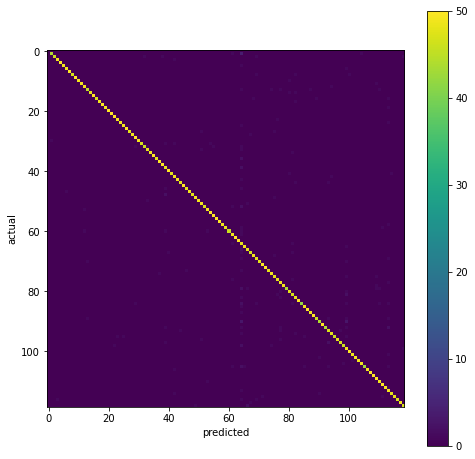

In [18]:
mean_confusion = np.mean(confusions, axis=0)

fig, ax = plt.subplots(figsize=(8, 8))

img = ax.imshow(mean_confusion)
fig.colorbar(img)

ax.set_ylabel("actual")
ax.set_xlabel("predicted")

plt.show()

OBS! least decodable is -1


Downloading:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

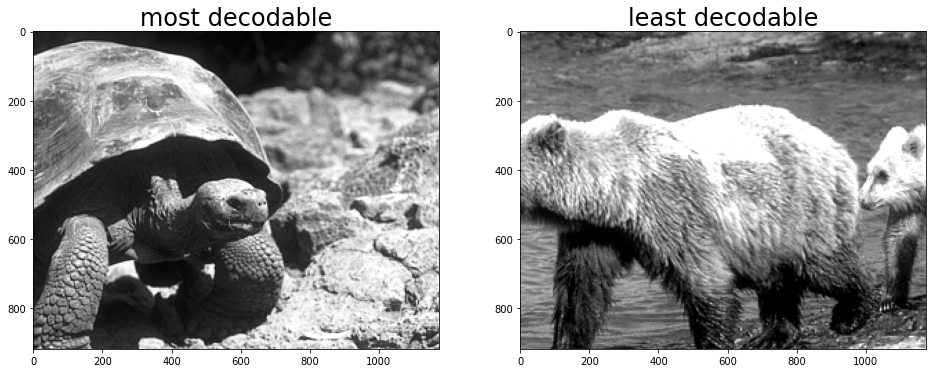

In [19]:
best = labels[np.argmax(np.diag(mean_confusion))]
worst = labels[np.argmin(np.diag(mean_confusion))]
if worst == -1:
    print("OBS! least decodable is -1")
    worst+=1

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

best_image = cache.get_natural_scene_template(best)
ax[0].imshow(best_image, cmap=plt.cm.gray)
ax[0].set_title("most decodable", fontsize=24)

worst_image = cache.get_natural_scene_template(worst)
ax[1].imshow(worst_image, cmap=plt.cm.gray)
ax[1].set_title("least decodable", fontsize=24)


plt.show()

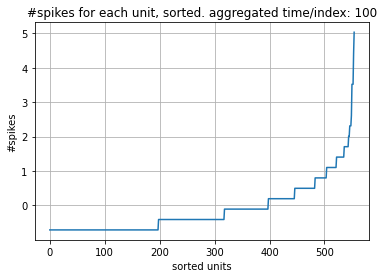

In [35]:
idx = 100
sort_ind = np.argsort(design_arr[idx])

plt.plot(np.arange(design_arr.shape[-1]),design_arr[idx,sort_ind])
plt.xlabel('sorted units')
plt.ylabel('#spikes')
plt.grid('on')
plt.title('#spikes for each unit, sorted. aggregated time/index: {}'.format(idx))
plt.show()

In [36]:
# reuse selected idx from above
exmp_inp = tf.Variable(design_arr[None,idx], dtype=float)

with tf.GradientTape() as tape:
    pred = model(inputs=exmp_inp,softmax=False)
    score = pred[0,tf.math.argmax(pred[0])]
    
grads = tape.gradient(score, exmp_inp)

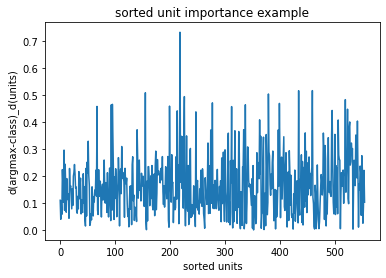

In [40]:
plt.plot(np.arange(design_arr.shape[-1]),np.abs(grads.numpy())[0,sort_ind])
plt.xlabel('sorted units')
plt.ylabel('d(argmax-class)_d(units)')
plt.title('sorted unit importance example')
plt.show()